In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json 
import ast


In [147]:
dataframe = pd.read_csv('Data/movie.metadata.genres.tsv', sep='\t')


# create a column with release month column

dataframe['Movie release Month'] = dataframe['Movie release date'].str[5:7]

#Convert string to int for month
dataframe['Movie release Month'] = pd.to_numeric(dataframe['Movie release Month'], errors='raise') #Check si les strings sont autres que des nombres

display(dataframe)

,Unnamed: 0,Wikipedia MovieID,Freebase MovieID,Movie name,Movie release date,Movie Boxoffice Revenue,Movie runtime,Movie Languages,Movie COuntries,Movie release Year,genre 1,genre 2,Movie release Month
0,0,9996498,/m/02pz844,Le Clown et ses chiens,1892-10-28,NaN,NaN,"{""/m/06ppq"": ""Silent film""}","{""/m/0f8l9c"": ""France""}",1892,Family Film,NaN,10
1,1,9999926,/m/02pzdsc,Un bon bock,1892-10-28,NaN,NaN,"{""/m/06ppq"": ""Silent film""}","{""/m/0f8l9c"": ""France""}",1892,Family Film,NaN,10
2,2,6431647,/m/0g53g2,Pauvre Pierrot,1892-10-28,NaN,NaN,"{""/m/06ppq"": ""Silent film""}","{""/m/0f8l9c"": ""France""}",1892,Family Film,NaN,10
3,3,10109752,/m/02q23xk,Miss Jerry,1894-10-09,NaN,NaN,"{""/m/06ppq"": ""Silent film""}","{""/m/09c7w0"": ""United States of America""}",1894,NaN,NaN,10
4,4,10094757,/m/02q1md8,Chinese Opium Den,1894-10-01,NaN,1.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",1894,NaN,NaN,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42661,42661,35042288,/m/0j630fh,Bulbul,2014-07,NaN,NaN,"{""/m/09bnf"": ""Kannada Language""}","{""/m/03rk0"": ""India""}",2014,NaN,NaN,7
42662,42662,36534974,/m/0kdy118,Noah,2014-03-28,NaN,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",2014,Drama,NaN,3
42663,42663,35764246,/m/0jt01_6,Appayya,2014-08-15,NaN,NaN,"{""/m/09bnf"": ""Kannada Language""}","{""/m/03rk0"": ""India""}",2014,Romance,NaN,8
42664,42664,27554912,/m/0c03gcc,Kung Fu Panda 3,2016-03-18,NaN,NaN,{},{},2016,NaN,NaN,3


In [148]:
# Takes out all the years where the number of movies is under 200

film_counts_year_without_missing_months = dataframe['Movie release Year'].value_counts().sort_index()

df2 = dataframe.copy(deep = True)

years_under_200 = film_counts_year_without_missing_months.index[film_counts_year_without_missing_months.values > 200]
df2 = df2[df2['Movie release Year'].isin(years_under_200)]
#we lose around 800 movies


In [173]:
def genre_distribution_over_month(df, genre, film_counts_month, split_year, when):  #df_genres, #Drama, #film_counts_month
    df_selected_gender=df[(df['genre 1'] == genre ) | (df['genre 2'] == genre)] #selecting genre
    genre_distrib = df_selected_gender.groupby('Movie release Month').count()['Movie name'] #genre distrib over months
    
     # Create the first subplot for the bar plot
    plt.figure(figsize=(4,3))
    plt.subplot(2, 1, 1)
    plt.bar(genre_distrib.index, genre_distrib.values, color='orange')
    if when == 'c':
        plt.title(f'Number of {genre} movie per Month for all Years')
    elif when == 'b':
        plt.title(f'Number of {genre} movie per Month before {split_year}')
    elif when == 'a':
        plt.title(f'Number of {genre} movie per Month after {split_year}')
    plt.ylabel(f'Number of {genre} movie')
    plt.grid()

    # Create the second subplot for the line plot
    plt.subplot(2, 1, 2)
    plt.bar(film_counts_month.index, genre_distrib.values/film_counts_month.values, color='blue')
    if when == 'c':
        plt.title(f'Number of {genre} movie per Month for all Years')
    elif when == 'b':
        plt.title(f'Number of {genre} movie per Month before {split_year}')
    elif when == 'a':
        plt.title(f'Number of {genre} movie per Month after {split_year}')
    plt.xlabel('Release Month')
    plt.ylabel(f'ratio of {genre} movies ')
    plt.grid()

    # Adjust layout
    plt.tight_layout()

    # Show the plots
    plt.show()

In [177]:
def visualizing_data(df, split_year, genre):
    #reducing colums to see clearly
    df_genres = df[['Movie name','genre 1', 'genre 2', 'Movie release Month', 'Movie release Year']]
    df_genres=df_genres[~(df_genres['genre 2'].isna() & df_genres['genre 1'].isna())] #removing when there 2 NaN : we lose around 4000 movies
    film_counts_month = df['Movie release Month'].value_counts().sort_index() #film by month for ratio
    
    df_after=df_genres[df_genres['Movie release Year']>=split_year]  #After 1990 42k -> 20k
    film_counts_month_a = df_after['Movie release Month'].value_counts().sort_index() #film by month for ratio
    df_before=df_genres[df_genres['Movie release Year']<split_year]  #Before 1990 42k -> 22k
    film_counts_month_b = df_before['Movie release Month'].value_counts().sort_index() #film by month for ratio
    
    #plt.subplot(2, 2, 1)
    genre_distribution_over_month(df_after, genre, film_counts_month_a, split_year, 'a')
    #plt.subplot(2, 2, 2)
    genre_distribution_over_month(df_before, genre, film_counts_month_b, split_year, 'b')
    #plt.subplot(2, 2, 3)
    genre_distribution_over_month(df_genres, genre, film_counts_month, split_year, 'c')
    #plt.show

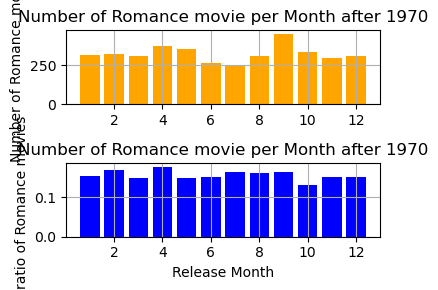

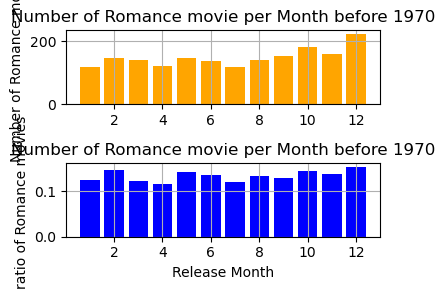

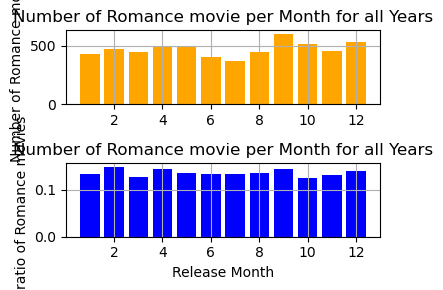

In [182]:
visualizing_data(df2, 1970, 'Romance')

df_drama=df_genres[(df_genres['genre 1'] == 'Drama' ) | (df_genres['genre 2'] == 'Drama')] #selecting genre

genre_distrib = df_drama.groupby('Movie release Month').count()['Movie name'] #genre distrib over months


film_counts_month = df2['Movie release Month'].value_counts().sort_index() #film by month for ratio